# In this notebook we simply realize the plots for the spatial correlations in the SPDC process, more information on how to make the expressions for the integration can be found in [1](https://onlinelibrary.wiley.com/doi/abs/10.1002/mma.3192) in the cells below we simply define the necessary libraries for symbolic calculus in sympy and write the expresssions to Integrate

In [1]:
from sympy import *
init_printing()
import numpy as np

In [2]:
qxs,qys,qxi,qyi,xs,ys,xi,yi,sigma,sigmax,sigmay=symbols('qxs qys qxi qyi xs ys xi yi sigma sigmax sigmay',real=True)

In [3]:
def phi(qxs,qys,qxi,qyi,xi,yi,xs,ys,sigma,sigmax,sigmay):
    alpha=exp(-sigma**2 * ((qxi+qxs)**2 +(qyi+qys)**2))
    beta= exp(-((sigmax*qxi)**2 +(sigmay*qyi)**2))
    kappa=exp(-((sigmax*qxs)**2 +(sigmay*qys)**2))
    theta=(exp(-I*qxi*xi) )*(exp(-I*qyi*yi))
    etta=(exp(-I*qxs*xs))*(exp(-I*qys*ys))
    return alpha*beta*kappa*etta*theta

In [4]:
phi(qxs,qys,qxi,qyi,xi,yi,xs,ys,sigma,sigmax,sigmay)

# Now we integrate with sympy, both mathematica and sympy cannot handle arbitratry $\sigma,\sigma_{x},\sigma_{y}$ so we fix those values in the function 

In [51]:
a=integrate(phi(qxs,qys,qxi,qyi,xi,yi,xs,ys,0.18,0.59,0.1),(qys,-oo,oo))

In [52]:
a=a.simplify()

In [53]:
b=integrate(a,(qxs,-oo,oo))

In [54]:
b=b.simplify()

In [55]:
c=integrate(b,(qxi,-oo,oo))

In [56]:
c=c.simplify()

In [57]:
d=integrate(c,(qyi,-oo,oo))

In [58]:
d=d.simplify()

# This is the analytical answer for those values of $\sigma,\sigma_{x},\sigma_{y}$

In [59]:
d

# Then we simply import libraries to plot and get the spatial correlation plots

In [60]:
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
import matplotlib.colorbar
%matplotlib notebook

# This one is the $x_{i}, x_{s}$ correlation

<IPython.core.display.Javascript object>


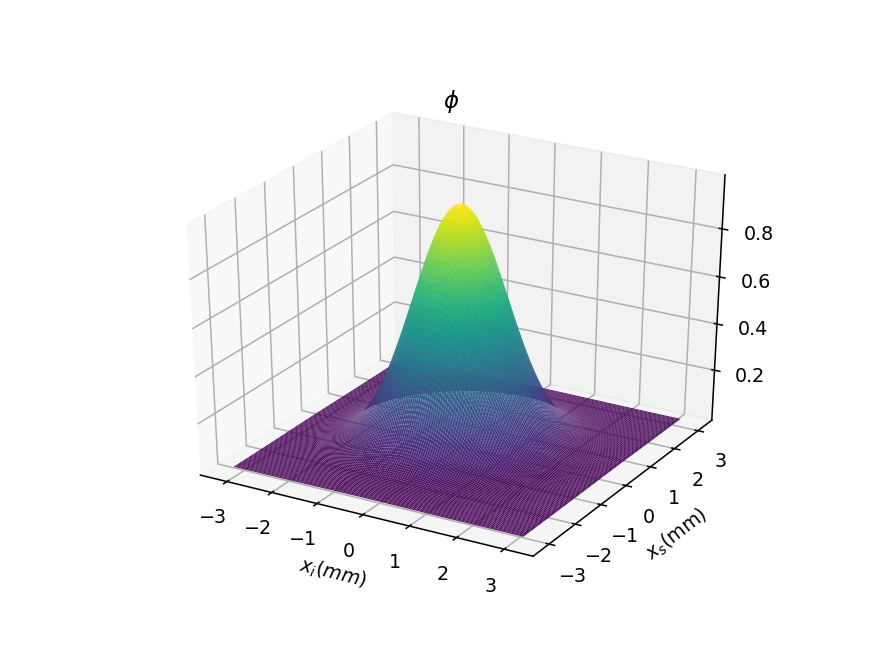

In [61]:
primera=d.subs(ys,0).subs(yi,0)
primera=primera/primera.subs(xs,0).subs(xi,0)
plot3d(primera,(xi,-pi,pi),(xs,-pi,pi),xlabel=r'$x_{i}(mm)$',ylabel=r'$x_{s}$(mm)',title=r'$\phi$',nb_of_points_x=150,nb_of_points_y=150)
plt.show()

 # This one is the $y_{i}, y_{s}$ correlation

<IPython.core.display.Javascript object>


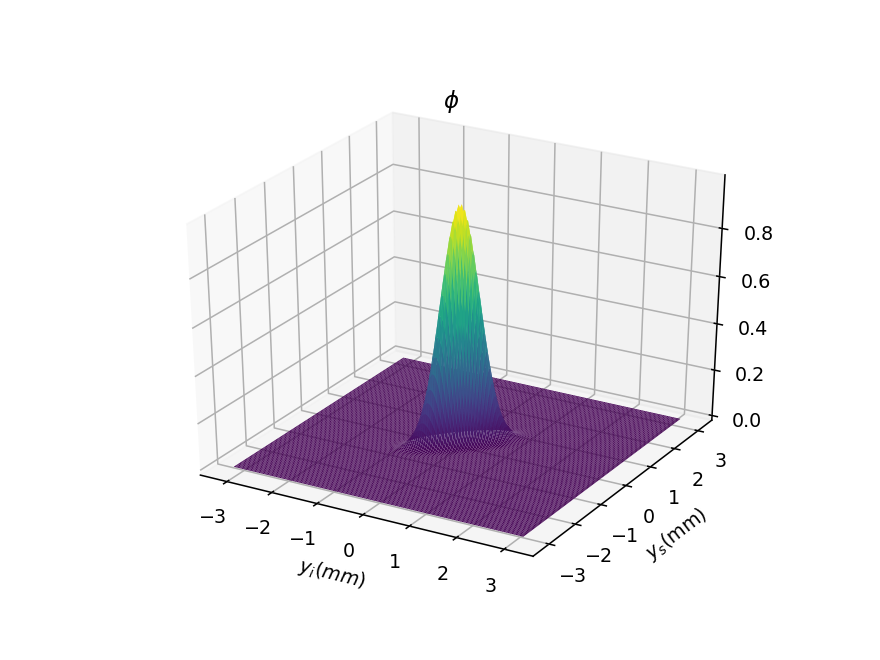

In [62]:
segunda=d.subs(xs,0).subs(xi,0)
segunda=segunda/segunda.subs(ys,0).subs(yi,0)
plot3d(segunda,(yi,-pi,pi),(ys,-pi,pi),xlabel=r'$y_{i}(mm)$',ylabel=r'$y_{s}$(mm)',title=r'$\phi$',nb_of_points_x=150,nb_of_points_y=150)
plt.show()


<IPython.core.display.Javascript object>


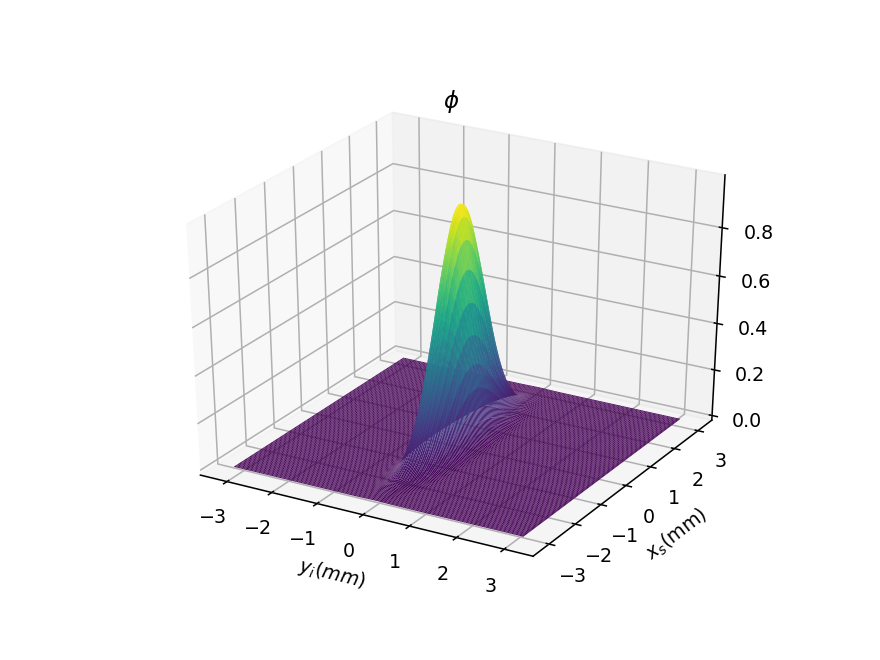

In [63]:
ter=d.subs(ys,0).subs(xi,0)
ter=ter/ter.subs(xs,0).subs(yi,0)
plot3d(ter,(yi,-pi,pi),(xs,-pi,pi),xlabel=r'$y_{i}(mm)$',ylabel=r'$x_{s}$(mm)',title=r'$\phi$',nb_of_points_x=150,nb_of_points_y=150)
plt.show()

<IPython.core.display.Javascript object>


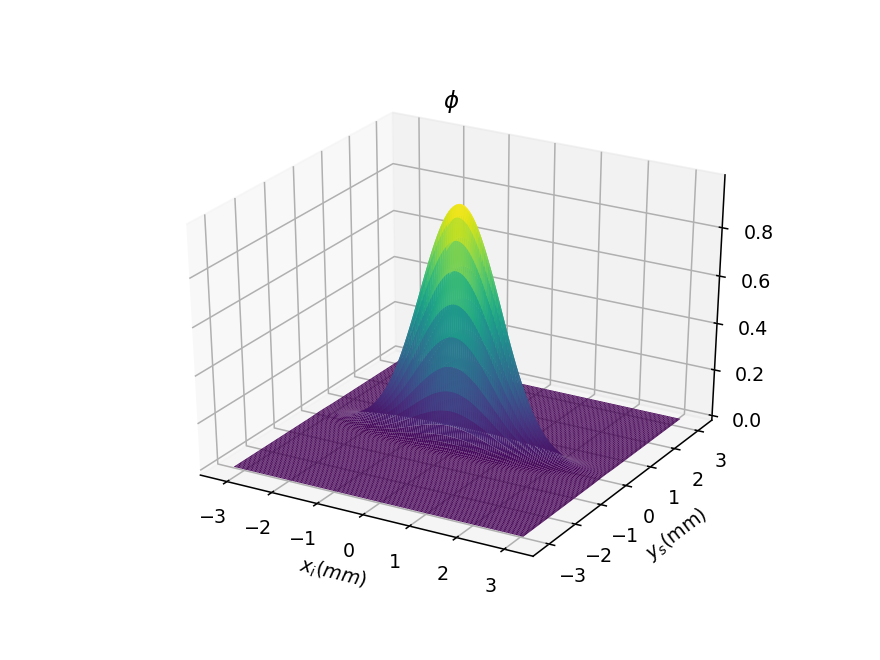

In [64]:
ter=d.subs(xs,0).subs(yi,0)
ter=ter/ter.subs(xi,0).subs(ys,0)
plot3d(ter,(xi,-pi,pi),(ys,-pi,pi),xlabel=r'$x_{i}(mm)$',ylabel=r'$y_{s}$(mm)',title=r'$\phi$',nb_of_points_x=150,nb_of_points_y=150)
plt.show()